In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from tpot import TPOTRegressor
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('data/Concrete Compressive Strength.csv')

In [4]:
df

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [5]:
#rename the columns
dicta_rename = {
        'Cement (component 1)(kg in a m^3 mixture)':'Cement',
        'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':'Blast_Furnace_Slag',
        'Fly Ash (component 3)(kg in a m^3 mixture)':'Fly_Ash',
        'Water  (component 4)(kg in a m^3 mixture)':'Water',
        'Superplasticizer (component 5)(kg in a m^3 mixture)':'Superplasticizer',
        'Coarse Aggregate  (component 6)(kg in a m^3 mixture)':'Coarse_Aggregate',
        'Fine Aggregate (component 7)(kg in a m^3 mixture)':'Fine_Aggregate',
        'Age (day)':'Age',
        "Concrete compressive strength(MPa, megapascals) ": "concrete_strength"}

In [6]:
# Rename columns
df = df.rename(columns=dicta_rename)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast_Furnace_Slag  1030 non-null   float64
 2   Fly_Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse_Aggregate    1030 non-null   float64
 6   Fine_Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   concrete_strength   1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Cement,1030.0,281.165631,104.507142,102.000000,192.375000,272.900000,350.000000,540.000000
Blast_Furnace_Slag,1030.0,73.895485,86.279104,0.000000,0.000000,22.000000,142.950000,359.400000
Fly_Ash,1030.0,54.187136,63.996469,0.000000,0.000000,0.000000,118.270000,200.100000
Water,1030.0,181.566359,21.355567,121.750000,164.900000,185.000000,192.000000,247.000000
Superplasticizer,1030.0,6.203112,5.973492,0.000000,0.000000,6.350000,10.160000,32.200000
Coarse_Aggregate,1030.0,972.918592,77.753818,801.000000,932.000000,968.000000,1029.400000,1145.000000
Fine_Aggregate,1030.0,773.578883,80.175427,594.000000,730.950000,779.510000,824.000000,992.600000
Age,1030.0,45.662136,63.169912,1.000000,7.000000,28.000000,56.000000,365.000000
concrete_strength,1030.0,35.817836,16.705679,2.331808,23.707115,34.442774,46.136287,82.599225


In [9]:
bool((np.linalg.matrix_rank(df)==len(df.keys())))

True

### Data looks clean, used numpys matrix rank to check for collinearity between the features, this returns a matrix rank of array using a SVD method. Here we can confirm that each vector is linearly independent from each other.

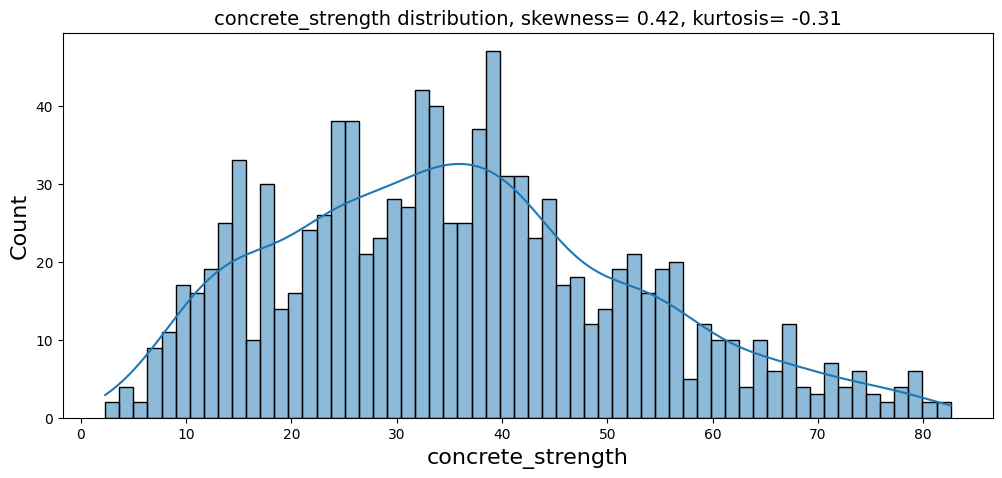

In [76]:
plt.figure(figsize=(12, 5))
sns.histplot(x="concrete_strength", kde=True, bins=60, data=df)
plt.title("concrete_strength distribution, skewness= " + str(round(df["concrete_strength"].skew(), 2)) +
          ", kurtosis= " + str( round(df["concrete_strength"].kurt(), 2)), fontsize=14)
plt.xlabel("concrete_strength", fontsize=16)
plt.ylabel("Count", fontsize=16)

plt.show()

### Looks like the dataset is a slightly skewed to the right with a low kurtosis, a longer tail coming out to the right. Overall I think it's safe to say that it normally distributed.

In [11]:
corrsort_df = df.corr()['concrete_strength'].sort_values(ascending=False)[1:]
abs_corrsort_df = abs(df.corr()['concrete_strength']).sort_values(ascending=False)[1:]

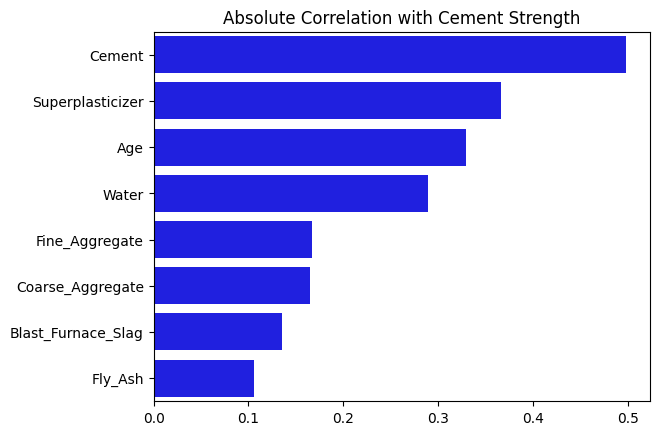

In [12]:
sns.barplot(x=abs_corrsort_df.values, 
            y=abs_corrsort_df.index, color='b').set(title='Absolute Correlation with Cement Strength');

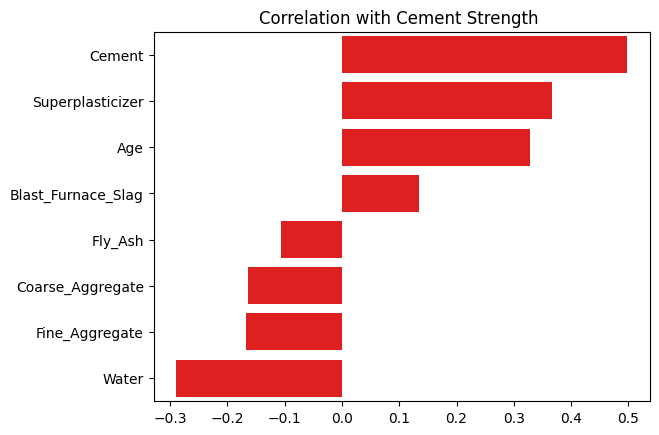

In [13]:
sns.barplot(x=corrsort_df.values,
            y=corrsort_df.index, color='r').set(title='Correlation with Cement Strength ');

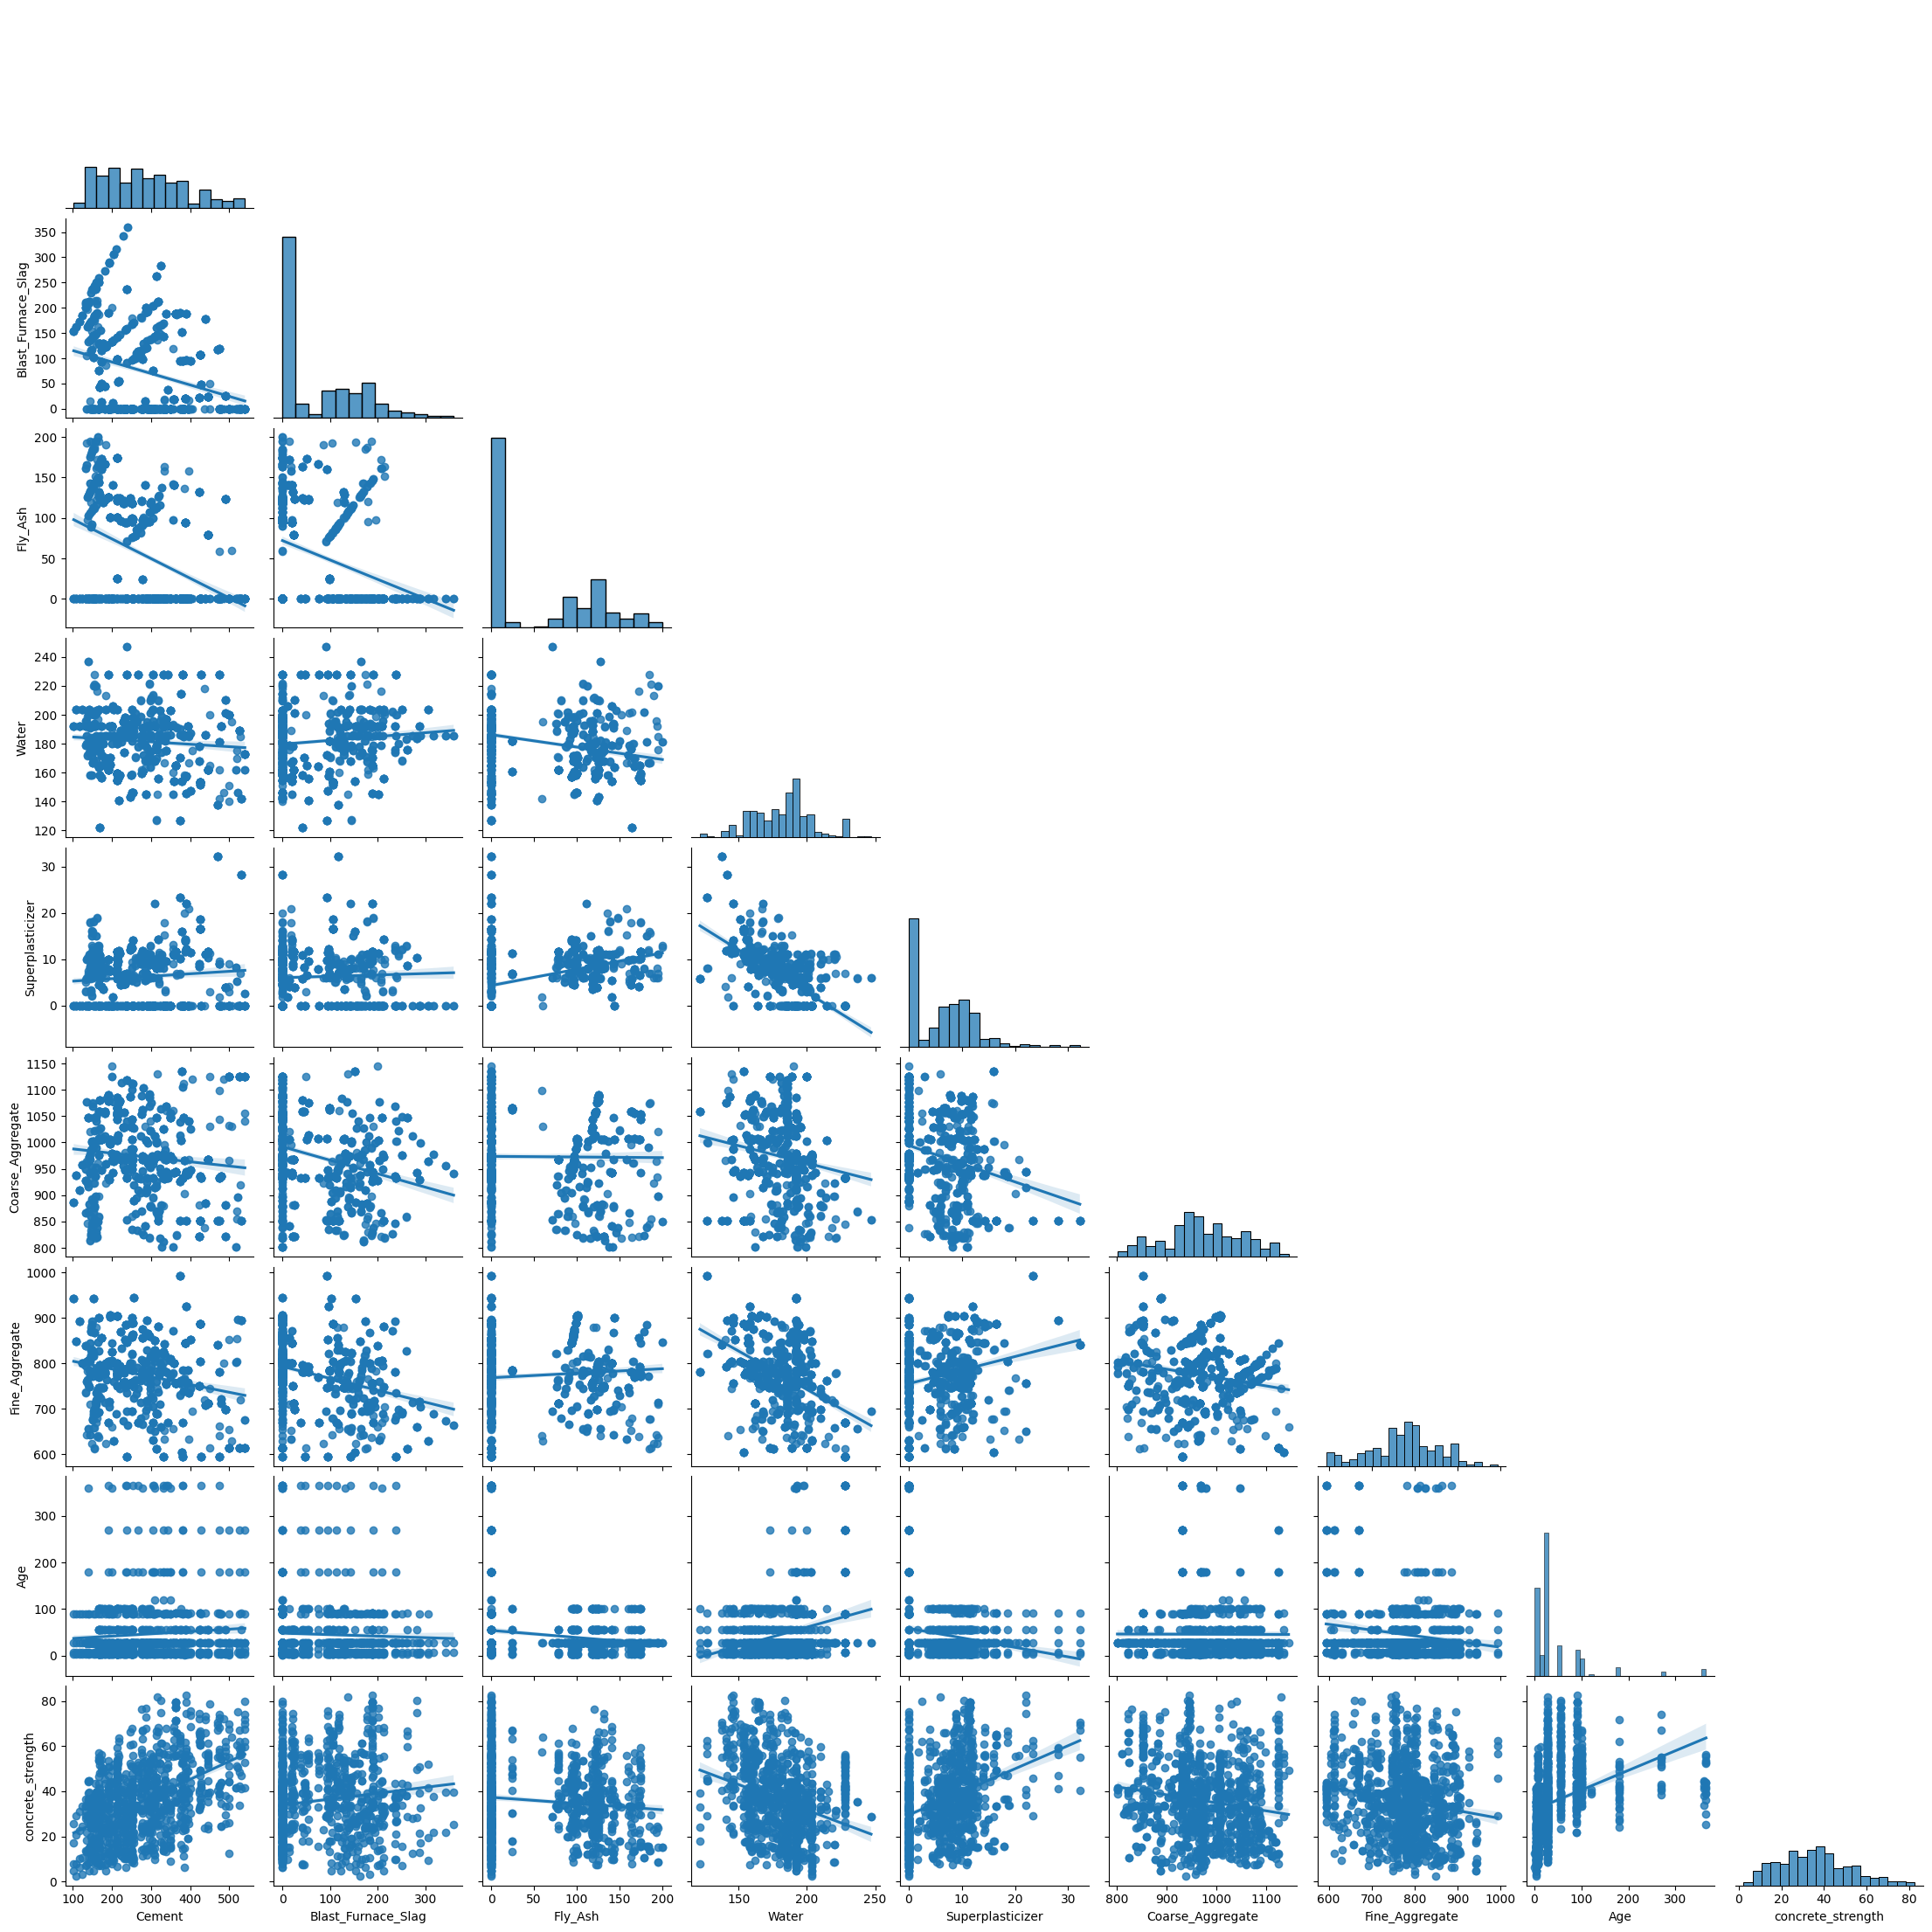

In [14]:
sns.pairplot(data=df, kind='reg', diag_kind='hist', corner=True);

### Investigating the relationship between the features and the concrete strength. Some observations we can see right away is that it seems that the cement feature has a strong positive relationship with cement. Age has a few outliers which could affect our models performance.

In [15]:
pipe_baseline = make_pipeline(StandardScaler(),
                             LinearRegression())

In [16]:
X = df.drop(columns='concrete_strength')
y = df['concrete_strength']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [18]:
pipe_baseline.fit(X_train, y_train)
y_pred = pipe_baseline.predict(X_test)
pipe_baseline_r2 = r2_score(y_test, y_pred)
pipe_baseline_mae = mean_absolute_error(y_test, y_pred)
pipe_baseline_mse = mean_squared_error(y_test, y_pred, squared=False)

In [19]:
print(f"r2: {pipe_baseline_r2},\nmae: {pipe_baseline_mae}, \nmse: {pipe_baseline_mse}")

r2: 0.601931423951606,
mae: 8.33552398397882, 
mse: 10.505252977222657


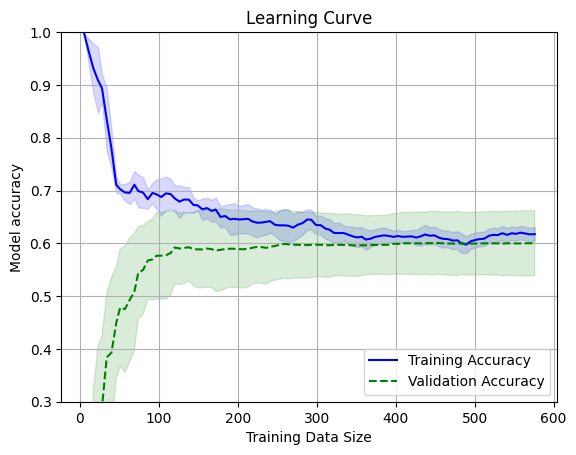

In [20]:
train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_baseline, X=X_train, y=y_train,
                                                       cv=5, train_sizes=np.linspace(0.01, 1.00, 100),
                                                     n_jobs=1, scoring='r2')
# Calculate training and test mean and std

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.plot(train_sizes, train_mean, color='blue', label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.ylim([.3, 1])
plt.grid()
plt.legend(loc='lower right')
plt.show()

### Built a baseline pipeline that standardized the data with the z-score and then runs a simple linear regression. I am getting a modest r2 score of 0.62. The training and validation curves seem to converging quite well. However I would like to improve the model with the TPOT api.

In [21]:
standardize = StandardScaler()

In [22]:
X_train_preproc = standardize.fit_transform(X_train)
X_test_preproc = standardize.transform(X_test)
tpot = TPOTRegressor(generations=4, population_size=20, verbosity=2, scoring='r2', n_jobs=-1, cv=5)
tpot.fit(X_train_preproc, y_train)
print(tpot.score(X_test_preproc, y_test))

Optimization Progress:   0%|          | 0/100 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8565785688646089

Generation 2 - Current best internal CV score: 0.8565785688646089

Generation 3 - Current best internal CV score: 0.8625055236795657

Generation 4 - Current best internal CV score: 0.8625055236795657

Best pipeline: RandomForestRegressor(RidgeCV(input_matrix), bootstrap=False, max_features=0.7500000000000001, min_samples_leaf=7, min_samples_split=19, n_estimators=100)
0.8768036061000485


In [23]:
optimal_pipe = tpot.fitted_pipeline_

In [24]:
optimal_pipe

Pipeline(steps=[('stackingestimator', StackingEstimator(estimator=RidgeCV())),
                ('randomforestregressor',
                 RandomForestRegressor(bootstrap=False,
                                       max_features=0.7500000000000001,
                                       min_samples_leaf=7,
                                       min_samples_split=19))])

In [25]:
# tpot.pareto_front_fitted_pipelines_

In [26]:
# tpot.evaluated_individuals_

In [27]:
y_pred = optimal_pipe.predict(X_test_preproc)
optimal_pipe_r2 = r2_score(y_test, y_pred)
optimal_pipe_mae = mean_absolute_error(y_test, y_pred)
optimal_pipe_mse = mean_squared_error(y_test, y_pred, squared=False)

In [28]:
print(f"r2: {optimal_pipe_r2}\nmae: {optimal_pipe_mae}\nmse: {optimal_pipe_mse}")

r2: 0.8768036061000485
mae: 4.359229686887161
mse: 5.844220123510238


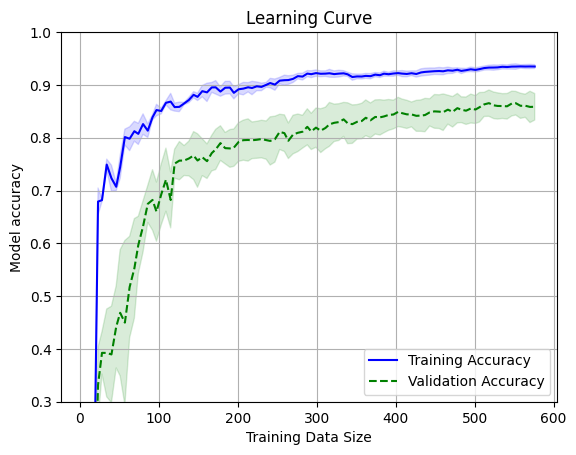

In [29]:
train_sizes, train_scores, test_scores = learning_curve(estimator=optimal_pipe, X=X_train, y=y_train,
                                                       cv=5, train_sizes=np.linspace(0.01, 1.00, 100),
                                                     n_jobs=1, scoring='r2')
# Calculate training and test mean and std

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.plot(train_sizes, train_mean, color='blue', label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.ylim([.3, 1])
plt.grid()
plt.legend(loc='lower right')
plt.show()

This helps to put it in perspective our model's performance and how the model actually works. For example in our learning curve for the linear regression you see the training line go from r2 = 1.0 dropping down and converging with our validation curve (which is what you want to see because as n the number of samples increases​ from 1 to the specified amount it should start to overfit less and start generalizing the data), however in the GradientBoostingRegressor our training and validation curve score move at a similar rate from 0 as n increases. Then it appears that the training score ends up just slightly overfitting. This can be confronted by tuning our preproccessing. EX: maybe it's the outliers that age contains(outliers tend to cause overfitting).  Although we already have a well performing model it might only update our score slightly.

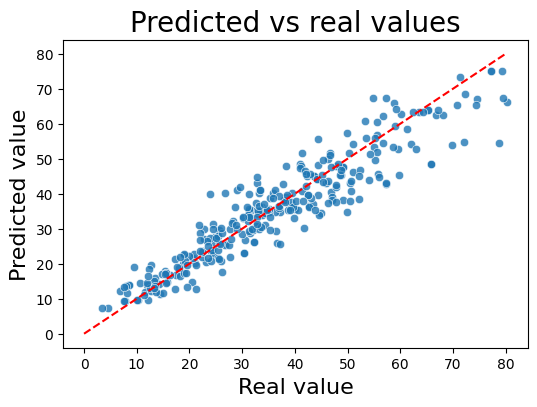

In [30]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.8)
line_X = np.linspace(0, 80, 100)
line_Y = line_X
plt.plot(line_X, line_Y, 'r--')
plt.title("Predicted vs real values", fontsize=20)
plt.xlabel('Real value', fontsize=16)
plt.ylabel('Predicted value', fontsize=16)
plt.show()

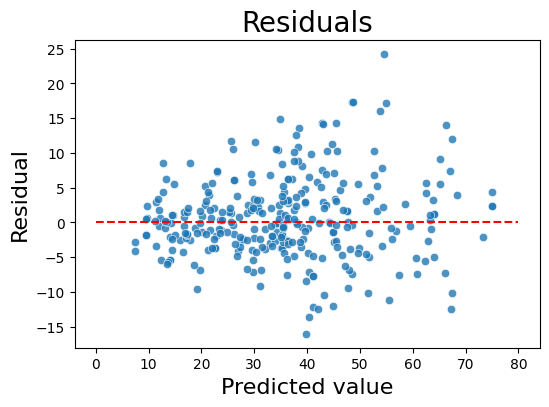

In [31]:
residuals = y_test-y_pred
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.8)
line_X = np.linspace(0, 80, 100)
line_Y = line_X*0
plt.plot(line_X, line_Y, 'r--')
plt.title("Residuals", fontsize=20)
plt.xlabel('Predicted value', fontsize=16)
plt.ylabel('Residual', fontsize=16)
plt.show()

### Usually I would have to use a bunch of different models utilizing gridsearchCV or randomsearchCV for tuning the parameters, but here TPOT does this for you and at model classification level. 

Below is how the process works from the TPOT, here is a simple summary:  First it does principle component analysis and polynonmial feature on the entire dataset separatly. This is pretty neat because on one dataset it updates the features degrees, and on the other dataset it does dimensionality reduction with PCA. The following steps then combines the two new updated features and then recursive feature elimination, this fits a model and selects/removes the features based on the feature's co-efficient and importance. It then uses sklearns Random Forest Classifier to select the best model. 

<div>
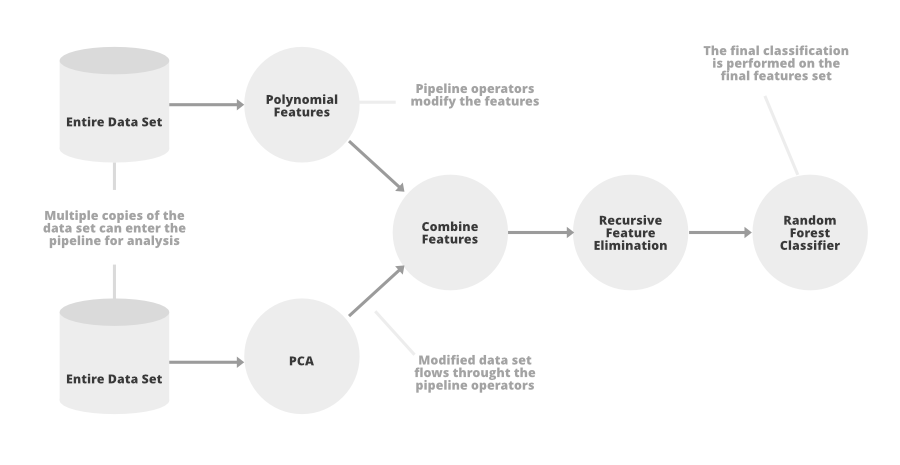
</div>

Image from http://epistasislab.github.io/tpot/, you can also read more about how it works with this [link](https://medium.com/towards-data-science/tpot-automated-machine-learning-in-python-4c063b3e5de9)

### Let's look at the parameters TPOT classified in the GradientBoostingRegressor!

This link gives was used as reference on how GradientBoostingRgressor works https://jerryfriedman.su.domains/ftp/trebst.pdf

Now before you go through this (if you have experience with the more popular algorithm, the gradient decent), read this quote from the link above, "gradient descent directly adds a direction vector to the current <b>x</b>, whereas training a gradient Boosting machine adds a weak model's approximation of the direction vector to the current output $\hat{y}$ ". From Wikipedia "boosting algorithms are iterative functional gradient descent algorithms. That is, algorithms that optimize a cost function over function space by iteratively choosing a function (weak hypothesis) that points in the negative gradient direction." If you are like me and have a better understanding of the gradient decent and haven't really touched the boosting ensemble methods this is great to think about and compare with this algorithm

#### 
<ul>
<li>alpha=0.95</li>
<li>loss=huber</li>
<li>learning_rate=0.5</li>
</ul>

<b>Alpha</b> was only slightly modified from default 0.9 --> 0.85

<b>Loss</b> from squared error --> huber

<b>learning_rate</b> from 1.0 --> 0.5

In this case TOPT choose the <b>huber</b> method (a combination of MAE and MSE) in creating the errors to map out the loss function. Because we are using the loss values that are less then delta (quantile threshold we decide to use in the piecewise function that the huber method uses) and applying the MSE function so that it gives us that curvature we want around the cusps of the function (the quadratic function). With MAE for the higher delta values it softens the penalty on the outliers . The <b>Loss</b> function in the case of a gradient boost regression is to minimize each split in the nodes of our tree. In a linear regression the alpha would be our learning rate on our loss function, in gradient boosting the <b>alpha</b> here indicates the top percentile of error that should be considered as outliers (it will be the delta in the huber function). So in the case of our <b>huber</b> loss function it is in place as delta as a quantile threshold on whether to penalize the observation with the squared error or absolute error.

Now for the <b>Learning Curve</b> here is to actually scale the tree's in the regression, this is to tune the bias and variance of our model. So from values 0.0 to 1.0 we'll shrink the trees

So in order to understand how these parameters work let's walkthrough the algorithm step by step with our TPOT defined tuned parameters and data. So first we need to initialize a constant value (our prediction constant), this will end up being the mean of our y values. Below is the function to find that constant. Let's look at it: $$f_{0}(x) = \textrm{arg min}_{\gamma} \sum \limits _{i=1} ^{N} L(y_{i}, \gamma)$$

<b>Argmin over gamma</b> is a function that finds the gamma (<b>${\gamma}$</b>) that minimizes the summation of the loss function

$y_{i}$ will be the true observations that we'll use to see the difference between our prediction <b>${\gamma}$</b> to get out pseudo residual

<b>${\gamma}$</b> <b>(gamma)</b> in this case with be our initialized constant, the prediction against our vector $y_{i}$

As for the <b>loss</b> function we'll use the squared error to find $f_{0}(x)$. Although the parameter was set to huber. This however is a problem because we need to find the difference in each observation with $f_{0}(x)$ in order to compare with delta  for the piecewise function to choose the loss function. So we set the loss function to the squared error, we could also choose absolute error if we wanted to. In the case for the sklearn function we actually just take the median of the y values. Here is the [link](https://github.com/scikit-learn/scikit-learn/blob/2e481f114169396660f0051eee1bcf6bcddfd556/sklearn/ensemble/tests/test_gradient_boosting_loss_functions.py#L228:~:text=for%20Loss%20in%20(LeastAbsoluteError,.median(y)) to the source code

However...
take a look at this:

$$\frac{\partial}{\partial \gamma} \sum \limits _{i=1} ^{N} (y_{i} - \gamma)^2$$
$$-2 \sum \limits _{i=1} ^{N} (y_{i} - \gamma)$$
$$-2(y_{1} - \gamma_1)... -2(y_{n} - \gamma_n) $$
$$2n\gamma - 2  \sum \limits _{i=1} ^{N} y_{i}$$
***
$$2n\gamma - 2  \sum \limits _{i=1} ^{N} y_{i} = 0 $$
$$n\gamma = \sum \limits _{i=1} ^{N} y_{i}$$
$$\gamma = \frac{1}{n} \sum \limits _{i=1} ^{N} y_{i}$$

First differentiate the sum of all the squared errors with respect to gamma. Then we set it to zero to solve for gamma, turns out gamma is the mean of all our values in our y vector! So we can just take the mean of our y values (again sklearn actually just takes the median values):

In [32]:
gamma = y.mean()
print(gamma)

35.8178358261136


The next step will be to build an array of residual values 

Compute for m = 1 to M and $i = 1,2,...,N$:

$$r_{im} = - \displaystyle \Bigg[\frac{\partial L(y_{i}, f(x_{i}))}{\partial f(x_{i})}\Bigg]_{f=f_{m−1}}$$

<b>m</b> at 1 will be our first tree and it will approach <b>M</b> our last tree 

<b>i</b> being the indexes for each row

The huber method requires the alpha quantile in our case:

In [33]:
y.quantile([.1, .25, .5, .75, .85, .95])

0.10    14.203206
0.25    23.707115
0.50    34.442774
0.75    46.136287
0.85    54.048024
0.95    66.804512
Name: concrete_strength, dtype: float64

We'll use 54.04 since TPOT decided that 85% would be the best percentile to use

In [34]:
delta = 54.04

Here is what happens when we differentiate both loss functions with respect to $\gamma$: 

$$\mathbf{\text{MAE}}$$ 
$$r_{im} = - \displaystyle \Bigg[\frac{\partial}{\partial \gamma} \lvert y_{i} - \gamma \rvert \Bigg]_{f=f_{m−1}}$$
$$ - \displaystyle \Bigg [sign(y_{i} - \gamma)\Bigg] \frac{\partial}{\partial \gamma} (y_{i} - \gamma) $$
$$ - \displaystyle \Bigg [- sign(y_{i} - \gamma)\Bigg] $$
***
$$\mathbf{\text{MSE}}$$
$$r_{im} = - \displaystyle \Bigg[\frac{\partial}{\partial \gamma)} \frac{1}{2}(y_{i} - \gamma) \Bigg]_{f=f_{m−1}}$$
$$ - \displaystyle \Bigg [(-y_{i} - \gamma)\Bigg] \frac{\partial}{\partial \gamma} (y_{i} - \gamma) $$
$$ \displaystyle \Bigg (y_{i} - \gamma \Bigg) $$

This is <b>m</b> at 1, this means it would give us $f_{0}$

This shows us that summation of MAE is a sign vector and MSE is just a simple residual vector.

In [51]:
#Lets code the huber method

In [36]:
residuals = []
loss_func = []
for observation in y:
    if abs(observation - gamma) <= delta:
        residuals.append(observation - gamma)
        loss_func.append('squared_err')
    else:
        -(-np.sign(observation - gamma))
        loss_func.append('abs_err')

Now that we have our residuals we can move on to the next step of the algorithm 

Fit a regression tree to the targets $r_{im}$ giving terminal regions<br>
$R_{jm}, j = 1, 2, . . . , J_{m}.$<br>

Terminal regions? Huh? This is just our leaves on the regression tree! ${j}$ being the index inside the leaf and again ${m}$ being the tree's index.

We'll use a very simple tree in to show this step with two leaves and three values from our cement feature.

In [37]:
df_r = pd.DataFrame({'cement': df['Cement'].head(3),'y_values':y[:3],  'residuals': residuals[:3], 'loss_func': loss_func[:3]})
df_r

,cement,y_values,residuals,loss_func
0,540.0,79.986111,44.168275,squared_err
1,540.0,61.887366,26.069530,squared_err
2,332.5,40.269535,4.451699,squared_err


In [38]:
(540 + 332.5)/2

436.25

<b>For</b> cement > 436.25: $R_{1,1}$ = [44.16, 26.06] <br>
<b>Else</b>: $R_{2,1}$ = 4.45

This is our very very simple regression tree (stump)!

Next, For $j = 1, 2, . . . , J_{m}$ compute<br>
$$\gamma_{jm} = \underset{\gamma}{\textrm{arg min}} \sum \limits _{x_{i} \in R_{jm}} L(y_{i}, f_{m−1}(x_{i}) + \gamma)$$
<br>

So for our first leaf ($R_{1,1}$ = [44.16, 26.06]) let's find gamma that minimizes loss function (squared error)

$$\gamma_{jm} = \underset{\gamma}{\textrm{arg min}} \frac{1}{2} (40.26 - (35.81 + \gamma))^2$$
$$\frac{\partial}{\partial \gamma}\frac{1}{2}(4.45 + \gamma)^2$$
$$4.45 + \gamma = 0$$


$\gamma = -4.45$

Now for the second leaf $R_{2,1}$ = 4.45 

$$\gamma_{jm} = \underset{\gamma}{\textrm{arg min}} \sum \limits _{x_{i} \in R_{im}} L(y_{i}, f_{m−1}(x_{i}) + \gamma)$$
$$\frac{\partial}{\partial \gamma} [ \frac{1}{2}(79.98 + (35.81 + \gamma))^2 + \frac{1}{2}(61.88 - (35.81 + \gamma))^2 ]$$
$$44.17 + \gamma + 26.07 + \gamma = 0$$
$$2\gamma = -70.24$$


$\gamma = -35.12$

Simple calculus to get the minimized gamma for each $R_{j}$

Update $f_{m}(x) = f_{m−1}(x) + \nu \sum _{j=1} ^{J_{m}} \gamma_{jm} I(x \in R_{jm})$ <br>
$\nu$ is the learning rate <br>
so for <b>m</b> at 1:

In [39]:
#code it
for i in range (0,3):
    print(f"{round(35.81 + (0.5*df_r['residuals'][i]))} in comparison with {round(y[i])} the difference: {abs(round(35.81 + (0.5*df_r['residuals'][i])) - round(y[i]))}")

58 in comparison with 80 the difference: 22
49 in comparison with 62 the difference: 13
38 in comparison with 40 the difference: 2


These are the predictions from the first tree we sampled from the cement feature (<b>m</b> at 1)

In [40]:
learning_rate = []
for i in np.arange(0.01, 1, 0.01):
    learning_rate.append(round(35.81 + (i*44.16)))

Text(0, 0.5, 'Prediction')

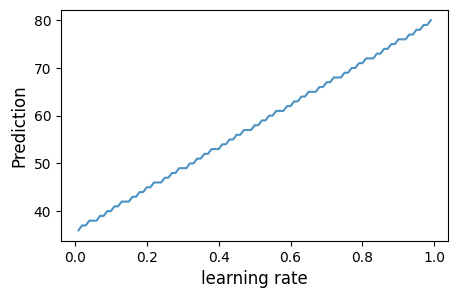

In [41]:
plt.figure(figsize=(5, 3))
sns.lineplot(x=np.arange(0.01, 1, 0.01), y=learning_rate, alpha=0.8)
plt.xlabel('learning rate', fontsize=12)
plt.ylabel('Prediction', fontsize=12)

So you can see how $\nu$ (the learning rate) controls the bias and variance in the algorithm

#### Since we are already at it lets take a look at gradient boosting for classification

We'll change this into a classification problem. Splitting our y into weak and strong, a binary task with our 50% quantile value: 34.44 being the threshold

In [42]:
y_classification = y.apply(lambda x: 'strong' if x > 34.44 else 'weak')

In [43]:
pipe_classifier = make_pipeline(StandardScaler(),
                             GradientBoostingClassifier())

In [44]:
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y_classification, test_size = 0.3)

In [45]:
pipe_classifier.fit(X_train_c, y_train_c)
y_pred_c = pipe_classifier.predict(X_test_c)
pipe_baseline_accuracy_score = accuracy_score(y_test_c, y_pred_c)
pipe_baseline_f1_score = f1_score(y_test_c, y_pred_c, pos_label='strong')
pipe_baseline_precision_score = precision_score(y_test_c, y_pred_c, pos_label='strong')
pipe_baseline_recall_score = recall_score(y_test_c, y_pred_c, pos_label='strong')

In [46]:
print(f"accuracy_score: {pipe_baseline_accuracy_score},\nf1_score: {pipe_baseline_f1_score}, \nprecision: {pipe_baseline_precision_score}, \nrecall: {pipe_baseline_recall_score}")

accuracy_score: 0.9158576051779935,
f1_score: 0.91875, 
precision: 0.91875, 
recall: 0.91875


Those are nice scores, however let's see if we can improve them with sklearn's gridsearchCV (this finds the best parameters)

In [72]:
# Hyperparameter Grid
grid = {'loss': ['log_loss', 'exponential'], 
       'criterion': ['friedman_mse', 'squared_error']}

search = GridSearchCV(GradientBoostingClassifier(), grid,
                      scoring = 'accuracy',
                      cv = 5,
                      n_jobs=-1 #paralellize computation
                     )

# Fit data to Grid Search
search.fit(X_train_c,y_train_c);

In [73]:
# Best Score
search.best_score_

0.8904214559386974

In [74]:
# Best estimator gives back the pipeline with the optimal parameters.
optimal_pipe = search.best_estimator_

In [75]:
# Best Params
search.best_params_

{'criterion': 'friedman_mse', 'loss': 'log_loss'}

It looks like we are just getting the default values back as the optimal parameters to use. Eh it was worth a shot to see. But wait?! Same parameters? and the same split data? How are we getting different scores? That's because gridsearch uses cross validation, this will actually give a more accurate score because it helps better show how our model is generalizing the data.

Let's go a ahead and hit the math.

Now Gradient Boosting for classification is a little more complicated, then regression.

The algorithm is the exact same as what we did with the regression task, however instead we put in place a loss function that can handle a classification task. The loss function MUST be differentiable. Since grid search established that the default value, the log loss, as the optimal function to use that is what we'll use.

So for this Math section I would like to thank <b>Professor Josh Starmer</b>! This section is of my notes I took from his lecture video on this algorithm with the log loss and will be applying it to our data.

Here is the loss function, it's the log loss function:

$$ - \sum \limits _{i=1} ^{N} y_{i} * \log(p) + (1 - y_{i}) + log(1 - p)$$

<b>p = the predicted probability

<b>$y_{i}$ = y values </b>

We have a binary task. Lets establish "weak" as our class = 0 and "strong" as our class = 1

So...

$y_{i}$ as 0 in the case of this function leaves you with $\log(1 - p)$<br>
$y_{i}$ as 1 in the case of this function leaves you with $\log(p)$

Now here is the data table that we'll use for demonstrations

In [93]:
pd.DataFrame({"Cement":df.sample(3, random_state=8)["Cement"], "y_values":y_classification.sample(3, random_state=8)})

,Cement,y_values
626,236.0,weak
58,304.0,strong
749,500.0,strong


Now before we tackle this let's do a review on some definitions of $\log and \log(odds)$:

Definition 1: $$[\log(p) - \log(1 - p)] = \log(\frac{p}{1 - p}) = \log(odds)$$

Definition 2:

<br>
$$\log(1 - p) =  \log(\frac{\mathrm{e}^{\log(odds)}}{1 + \mathrm{e}^{\log(odds)}}) = \log(\frac{1 + \mathrm{e}^{\log(odds)}}{1 + \mathrm{e}^{\log(odds)}} - \frac{\mathrm{e}^{\log(odds)}}{1 + \mathrm{e}^{\log(odds)}}) = \log(\frac{1}{1 + \mathrm{e}^{\log(odds)}}) = \log(1) - \log(1 + \mathrm{e}^{\log(odds)}) = - \log(1 + \mathrm{e}^{\log(odds)})$$

***
****
***

Okay lets look at the first step again:

$$f_{0}(x) = \textrm{arg min}_{\gamma} \sum \limits _{i=1} ^{N} L(y_{i}, \gamma)$$

We'll solve $\gamma (gamma)$ in terms of the predicted $\log(odds)$ <br>

Let's simplify to the predicted $\log(odds)$ without the summation:

$$ - [y_{i} * \log(p) + (1 - y_{i}) + log(1 - p)]$$

$$ -y_{i} * [\log(p) - \log(1 - p)] - \log(1 - p) $$

Apply definition 1 for $ [\log(p) - \log(1 - p)]$:

$$ -y_{i} * \log(odds) - \log(1 - p) $$

Apply definition 2 for $\log(1−𝑝)$:

$$ - y_{i} * \log(odds) +  \log(1 + \mathrm{e}^{\log(odds)})$$

So now we can differentiate the loss function with respect to $\log(odds)$: 

$$\frac{\partial}{\partial \log(odds)} - y_{i} * \log(odds) +  \log(1 + \mathrm{e}^{\log(odds)}) $$

hmm... <br>chain rule. yes. chain rule

$$- y_{i} + \frac{1}{1 + \mathrm{e}^{\log(odds)}} *  \mathrm{e}^{\log(odds)} $$

$$- y_{i} + \frac{\mathrm{e}^{\log(odds)}}{1 + \mathrm{e}^{\log(odds)}} $$


$\mathbf{\text{ Friedman's Gradient Tree Boosting Algorithm (with the learning rate added!)}}$<br>
***
1.&emsp;Initialize model with a constant value $$f_{0}(x) = \textrm{arg min}_{\gamma} \sum \limits _{i=1} ^{N} L(y_{i}, \gamma)$$
2.&emsp;For m = 1 to M:<br>
&emsp;&emsp;(a)&emsp;For $i = 1,2,...,N$ compute<br>
    $$r_{im} = - \displaystyle \Bigg[\frac{\partial L(y_{i}, f(x_{i}))}{\partial f(x_{i})}\Bigg]_{f=f_{m−1}}$$
&emsp;&emsp;(b)&emsp;Fit a regression tree to the targets $r_{im}$ giving terminal regions<br>
&emsp;&emsp;&emsp;&emsp;$R_{jm}, j = 1, 2, . . . , J_{m}.$<br><br>
&emsp;&emsp;(c)&emsp;For $j = 1, 2, . . . , J_{m}$ compute<br>
$$\gamma_{jm} = \underset{\gamma}{\textrm{arg min}} \sum \limits _{x_{i} \in R_{jm}} L(y_{i}, f_{m−1}(x_{i}) + \gamma)$$
<br>
&emsp;&emsp;(d)&emsp;Update $f_{m}(x) = f_{m−1}(x) + \nu \sum _{j=1} ^{J_{m}} \gamma_{jm} I(x \in R_{jm})$<br><br>
3. Output $\hat{f}(x) = f_{M}(x)$
***